In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files #import csv file(Dataset) 
files.upload()

Saving A10.csv to A10.csv


{'A10.csv': b'Carbo,Tiempo,Tiempo_F,Insulina,Glucosa,Ingesta\r\nIngesta1,0,0,4.545417194,113.3148622,2000\r\nIngesta1,1,1,4.545417194,113.3151475,2000\r\nIngesta1,2,2,4.545417194,113.3167484,2000\r\nIngesta1,3,3,4.545417194,113.3216619,2000\r\nIngesta1,4,4,4.545417194,113.3327355,2000\r\nIngesta1,5,5,4.545417194,113.3534813,2000\r\nIngesta1,6,6,4.545417194,113.3878902,2000\r\nIngesta1,7,7,4.545417194,113.4402683,2000\r\nIngesta1,8,8,4.545417194,113.5151003,2000\r\nIngesta1,9,9,4.545417194,113.6169396,2000\r\nIngesta1,10,10,4.545417194,113.7503192,2000\r\nIngesta1,11,11,4.545417194,113.9196829,2000\r\nIngesta1,12,12,4.545417194,114.1293313,2000\r\nIngesta1,13,13,4.545417194,114.3833804,2000\r\nIngesta1,14,14,4.545417194,114.6857318,2000\r\nIngesta1,15,15,1.545417194,115.0400481,0\r\nIngesta1,16,16,1.545417194,115.4496558,0\r\nIngesta1,17,17,1.545417194,115.9171115,0\r\nIngesta1,18,18,1.545417194,116.4438203,0\r\nIngesta1,19,19,1.545417194,117.0300114,0\r\nIngesta1,20,20,1.545417194,117.

In [ ]:
data = pd.read_csv('A10.csv')
data_original=data.copy()
# crear una máscara booleana para filas donde el valor en la columna 1 es 0
mask = data['Ingesta'] == 0
# crear un nuevo DataFrame sin las filas que cumplen la condición
data = data.loc[~mask]

# imprimir DataFrame filtrado
print('DataFrame Original:')
print(data_original.shape)
print('DataFrame filtrado:')
print(data.shape)
data.head(20)

DataFrame Original:
(20160, 6)
DataFrame filtrado:
(630, 6)


,Carbo,Tiempo,Tiempo_F,Insulina,Glucosa,Ingesta
0,Ingesta1,0,0,4.545417,113.314862,2000.000000
1,Ingesta1,1,1,4.545417,113.315147,2000.000000
2,Ingesta1,2,2,4.545417,113.316748,2000.000000
3,Ingesta1,3,3,4.545417,113.321662,2000.000000
4,Ingesta1,4,4,4.545417,113.332735,2000.000000
5,Ingesta1,5,5,4.545417,113.353481,2000.000000
6,Ingesta1,6,6,4.545417,113.387890,2000.000000
7,Ingesta1,7,7,4.545417,113.440268,2000.000000
8,Ingesta1,8,8,4.545417,113.515100,2000.000000
9,Ingesta1,9,9,4.545417,113.616940,2000.000000


In [ ]:
#datos=pd.read_csv('A1.csv', encoding='utf-8', usecols=['Glucosa','Insulina','Ingesta'])

X = data.iloc[0:585, 3:5].values #Tomo solo glucosa e insulina y dejo las dos últimas ingestas para validación
y = data.iloc[0:585, -1].values #como labels tomo carbohidratos y dejo las dos últimas ingestas para validació
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
data.head(10)
print(X.shape)


(585, 2)


modelo 1

In [ ]:
regressor = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=20000, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
regressor.fit(X_train, y_train)

SVR(C=20000)

In [ ]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Error cuadrático medio en el conjunto de prueba:', mse)
print('Error absoluto medio en el conjunto de prueba:', mae)

Error cuadrático medio en el conjunto de prueba: 17272.20331982513
Error absoluto medio en el conjunto de prueba: 101.48373571468365


In [ ]:
# Predicciones test
# ==============================================================================
predicciones = regressor.predict(X_test)
#predicciones

In [ ]:

#data = pd.read_csv('A1_p.csv')#predecir de otro paciente

N=40 #Número de ingesta

X_new = data.iloc[(N-1)*15:N*15, 3:5].values #Tomo la penúltima ingesta
y_new = data.iloc[(N-1)*15:N*15, -1].values #Tomo la penúltima ingesta
#print(X_new)

In [ ]:
y_pred = regressor.predict(X_new)
y_pred

array([6684.18860151, 6684.71651303, 6685.16554733, 6685.43115244,
       6685.36422425, 6684.78099909, 6683.47328283, 6681.21785936,
       6677.78492107, 6672.94573229, 6666.47981159, 6658.18203207,
       6647.87004126, 6635.39239514, 6620.63777252])

In [ ]:
y_new

array([6666.666667, 6666.666667, 6666.666667, 6666.666667, 6666.666667,
       6666.666667, 6666.666667, 6666.666667, 6666.666667, 6666.666667,
       6666.666667, 6666.666667, 6666.666667, 6666.666667, 6666.666667])

In [ ]:
y_pred1=np.concatenate((y_pred,[0]*10),axis=0)
x_in=np.concatenate((y_new,[0]*10),axis=0)

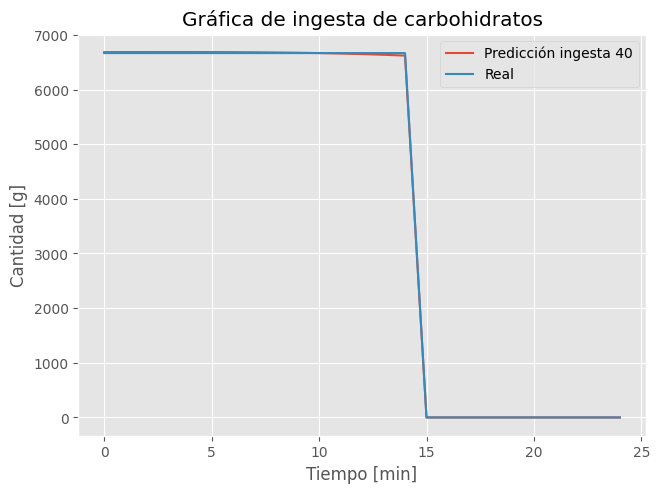

In [ ]:
#plt.title("Gráfico de predicciones") # agrega un título a la gráfica
a="Predicción ingesta " + str(N)
plt.title("Gráfica de ingesta de carbohidratos", loc='Center') # alinea el título a la izquierda
plt.tight_layout() # ajusta el espaciado de la gráfica
plt.plot(y_pred1,label=a)
plt.plot(x_in,label='Real')
plt.legend()
plt.xlabel("Tiempo [min]") # título del eje x
plt.ylabel("Cantidad [g]") # título del eje y
plt.show()
